In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [2]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse
 

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)
 

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)
 

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise
 

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander
 

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference
 

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]
 

    return ecg_data
 

ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

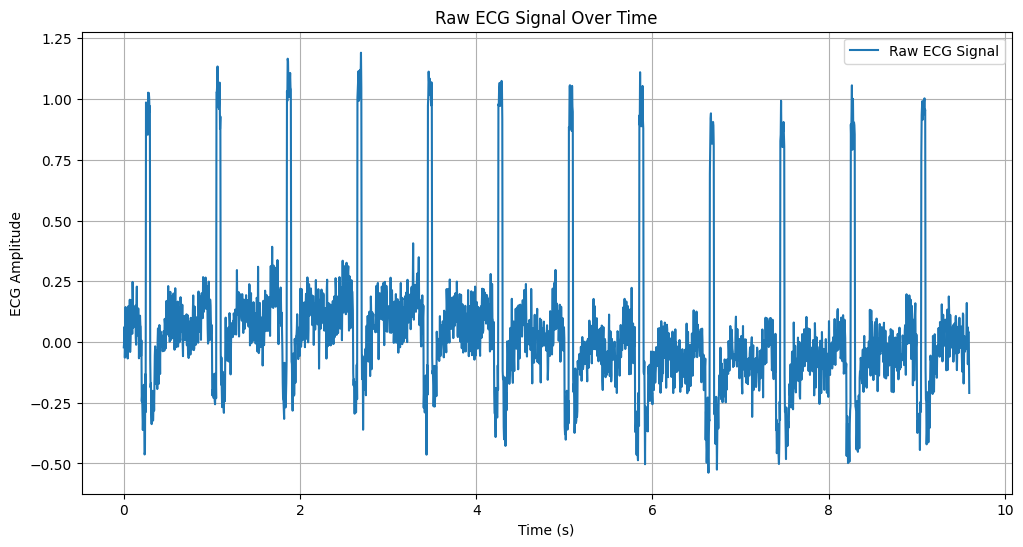

In [4]:
# Part 1: Visualizing the ECG Signal

# Generate the ECG data
sampling_rate = 250  # Sampling rate in Hz
duration = 10  # Duration in seconds
ecg_data = generate_ecg_data(duration, sampling_rate)

# Compute the time array
time = np.arange(len(ecg_data)) / sampling_rate

# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data, label="Raw ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Raw ECG Signal Over Time")
plt.grid(True)
plt.legend()
plt.show()

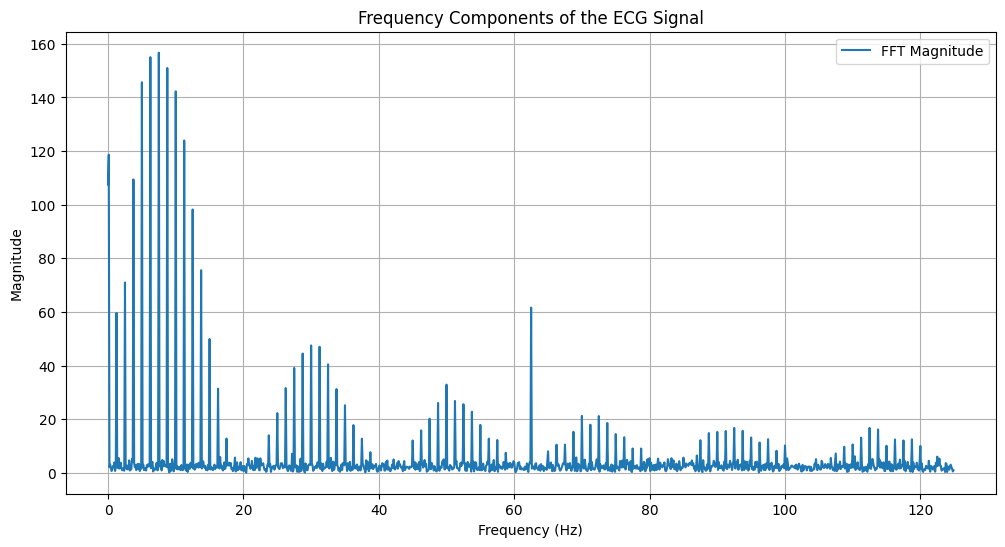

In [5]:
# Part 2: Fourier Transform

# Compute the Fourier transform of the ECG signal
ecg_fft = fft(ecg_data)
n = len(ecg_data)  # Number of samples
freq = np.fft.fftfreq(n, d=1/sampling_rate)  # Frequency array

# Take only the positive frequencies and corresponding FFT magnitudes
positive_freqs = freq[:n//2]
fft_magnitude = np.abs(ecg_fft[:n//2])

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, fft_magnitude, label="FFT Magnitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Components of the ECG Signal")
plt.grid(True)
plt.legend()
plt.show()

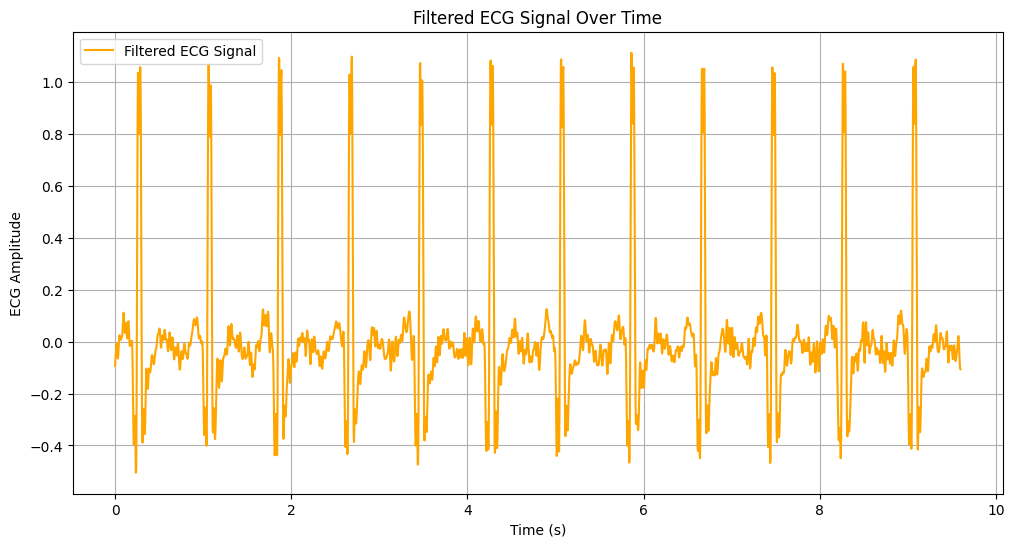

In [6]:
# Part 3: Filtering the ECG Signal

# Define the frequency range for the bandpass filter
low_cutoff = 0.5  # Lower cutoff frequency in Hz
high_cutoff = 40.0  # Upper cutoff frequency in Hz

# Create a mask to preserve only the desired frequencies
bandpass_mask = (np.abs(freq) >= low_cutoff) & (np.abs(freq) <= high_cutoff)

# Apply the mask to the Fourier-transformed signal
filtered_fft = ecg_fft * bandpass_mask

# Reconstruct the filtered ECG signal using the inverse Fourier transform
filtered_ecg = np.real(ifft(filtered_fft))

# Plot the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg, label="Filtered ECG Signal", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal Over Time")
plt.grid(True)
plt.legend()
plt.show()

Heart Rate: 74.97 BPM


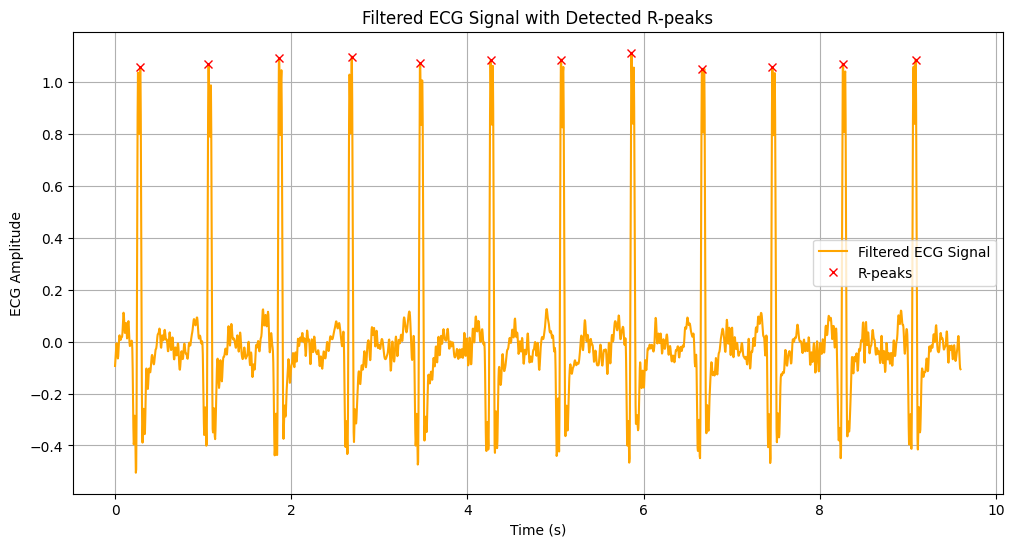

In [7]:
# Part 4: Heart Rate Calculation

# Detect R-peaks in the filtered ECG signal
peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=sampling_rate * 0.6)  # Adjust height and distance as needed

# Calculate the time intervals between successive R-peaks
r_peak_intervals = np.diff(peaks) / sampling_rate  # Convert sample intervals to seconds

# Compute the heart rate in beats per minute (BPM)
average_interval = np.mean(r_peak_intervals)
heart_rate_bpm = 60 / average_interval

# Print the calculated heart rate
print(f"Heart Rate: {heart_rate_bpm:.2f} BPM")

# Plot the filtered ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg, label="Filtered ECG Signal", color="orange")
plt.plot(peaks / sampling_rate, filtered_ecg[peaks], "rx", label="R-peaks")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal with Detected R-peaks")
plt.grid(True)
plt.legend()
plt.show()

Part 5: Summary of Findings

Part 1 visualizes the ECG data with a sampling rate of 250 Hz for 10 seconds. The raw signal can be seen and is very noisy as can be seen in the Raw ECG Signal Over Time graph. Part 2 does a Fourier Transform on the data so that the different frequencies that make up the raw ECG signal can be decomposed and graphed in the frequency domain. This can be seen in the Frequency Components of the ECG Signal graph. The frequencies with the greatest magnitude are between 1-20 Hz but there are frequencies all the way up to 130 Hz. Part 3 filters the signal so that only the frequencies in a normal physiological range are kept. Then, the inverse Fourier Transform is used to reconstruct the ECG signal with the desired range of frequencies. This can be visualized in the Filtered ECG Signal Over Time graph. When compared to the original raw ECG graph, it is clear that the signal is less noisy and is only made up of physiologically relevant frequencies. Part 4 uses the filtered ECG to detect the R-peaks in the QRS complex. The average interval between these peaks is calculated which is then used to calculate the heart rate. The labeled R-peaks can be seen in the Filtered ECG Signal with Detected R-peaks graph and the heart rate was calculated to be 74.97 bpm. This value makes sense because it is in the normal range of 60 to 100 bpm for a healthy adult.